# Clasificación de flores Iris

## 1. Definición del problema

El presente proyecto busca construir un modelo que sea capaz de determinar en la forma más precisa posible la categoría de una flor, tomando para ello cuatro mediciones asociadas a la misma como base. Notar que todas las mediciones se han realizado en la misma unidad de medida y comparten la misma escala. Además, existen tres categorías posibles a las que puede pertenecer la flor.

Se espera que la precisión de clasificación del modelo sobre datos no vistos sea de al menos un 80%. 

Con el modelo resultante, se busca que la comunidad de estudio de flores puede agilizar su proceso de categorización.

## 2. Descripción de datos

### 2.1 Carga de datos

En esta sección, se carga el conjunto de datos que servirá para entrenar los diferentes modelos candidatos. Antes de ello, se importan los diferentes modulos que se usarán a lo largo del proyecto.

In [10]:
# Load libraries
import numpy
import pandas
from pandas import read_csv
import seaborn
from matplotlib import pyplot
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as CART
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import AdaBoostClassifier as AB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier as GB

import logging
logging.getLogger('tensorflow').disabled = True

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import warnings
import pickle

In [2]:
# Load dataset

filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'] # Attributes names
dataset = read_csv(filename, names=names)

### 2.2 Variables independientes

Cada flor del conjunto de datos está definido por cuatro atributos:

- Longitud del sépalo
- Ancho del sépalo
- Longitud del pétalo
- Ancho del pétalo

Cada una las mediciones anteriores se encuentra expresada en centímetros.

### 2.3 Variable dependiente

La variable dependiente corresponde a la categoría o clase de la flor. Dicha flor puede pertenecer a una y solo una de las siguientes categorías:

- Iris setosa
- Iris virginica
- Iris versicolor

### 2.4 Estadísticas descriptivas

#### 2.4.1 Dimensiones del dataset

In [47]:
# Print data shape

rows, columns = dataset.shape
print('El dataset está compuesto por', rows, 'instancias y', columns, 'atributos.')

El dataset está compuesto por 150 instancias y 5 atributos.


#### 2.4.2 Características de atributos

In [48]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Cada atributo es de tipo punto flotante y no posee valores nulos.

#### 2.4.3 Resumen estadístico de atributos

Se procede a mostrar el valor promedio, la desviación estándar, el valor mínimo, los percentiles 25, 50 y 75 y el valor máximo de cada atributo.

In [49]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Tal como se mencionó antes, todos los atributos están expresados en centímetros y sus escalas son similares. Prueba de ello es el hecho de que ninguna de estas mediciones sobrepasa los 8 [cm].

#### 2.4.4 Un vistazo de los datos

A continuación, se muestran las primeras veinte instancias del dataset, cada una de ellas definida por sus atributos y su categoría. 

In [50]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

#### 2.4.5 Distribución de clases

In [51]:
for class_name, class_group in dataset.groupby('class'):
    print('Clase:', class_name)
    print('Número de instancias:', len(class_group))
    print('Porcentaje de instancias respecto al total:', round(100.0 * len(class_group) / dataset.shape[0], 2))
    print('')

Clase: Iris-setosa
Número de instancias: 50
Porcentaje de instancias respecto al total: 33.33

Clase: Iris-versicolor
Número de instancias: 50
Porcentaje de instancias respecto al total: 33.33

Clase: Iris-virginica
Número de instancias: 50
Porcentaje de instancias respecto al total: 33.33



Luego, se puede ver que cada clase posee la misma cantidad de instancias (50, o en otras palabras, el 33% del dataset). Por lo tanto, se está tratando con un problema de clasificación balanceado.

## 3 Visualización de datos

### 3.1 Gráficos univariados

Por cada atributo, se crea un histograma que permita tener una idea básica de su distribución. 

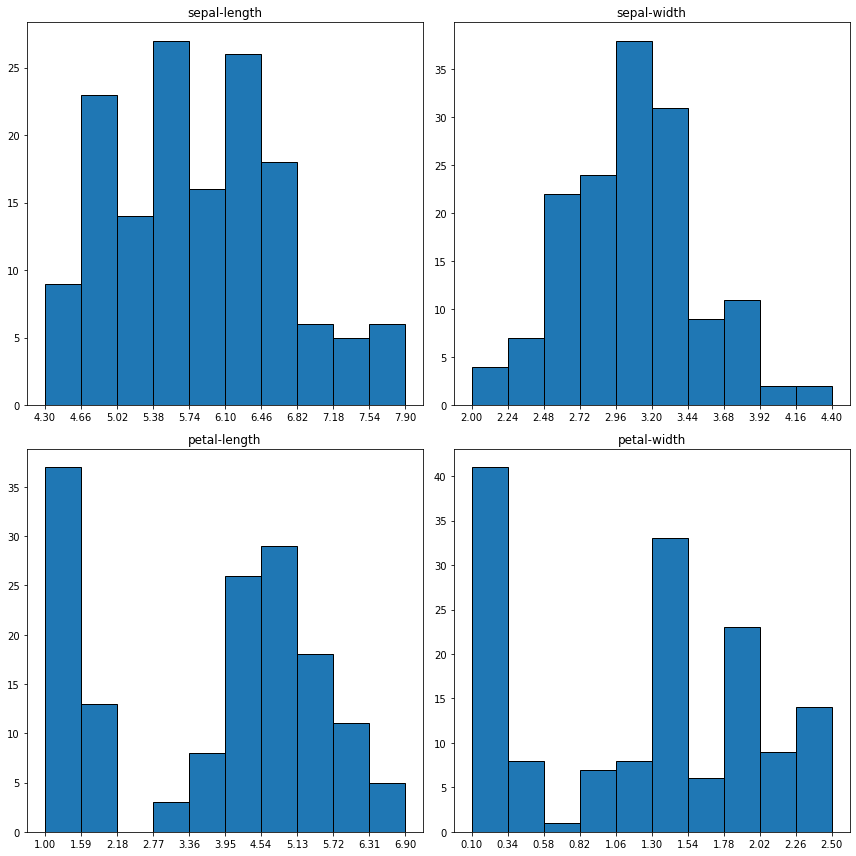

In [52]:
_, axes = pyplot.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

for (col_name, ax) in zip(dataset.columns[:-1], axes):
    ax.set_title(col_name)
    _, bins, _ = ax.hist(dataset[col_name], histtype='bar', ec='black')
    ax.set_xticks(bins)
  
pyplot.tight_layout()

A primera vista, se podría decir que el ancho del sépalo sigue una distribución gaussiana, mientras que el largo del sépalo sigue una distribución "casi-gaussiana".

También, por cada atributo, se crea un boxplot para visualizar tanto su distribución como también la presencia / ausencia de outliers.

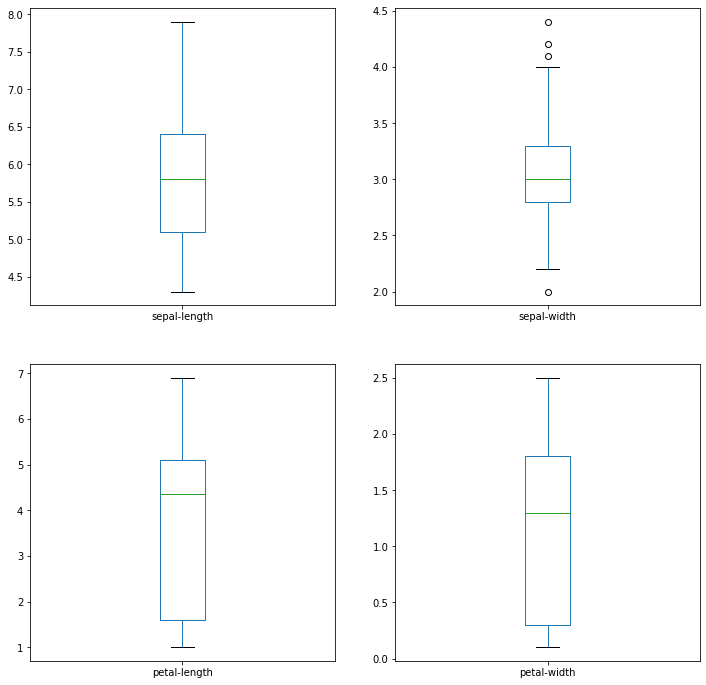

In [53]:
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(12, 12))
pyplot.show()

Luego, se observa que el ancho del sépalo presenta cuatro valores atípicos.

### 3.2 Gráficos multivariados

Se procede a construir gráficos que permitan visualizar las interacciones entre las variables del problema.

En primer lugar, se elabora un scatter plot por cada par de atributos. 

[None, None, None, None, None, None]

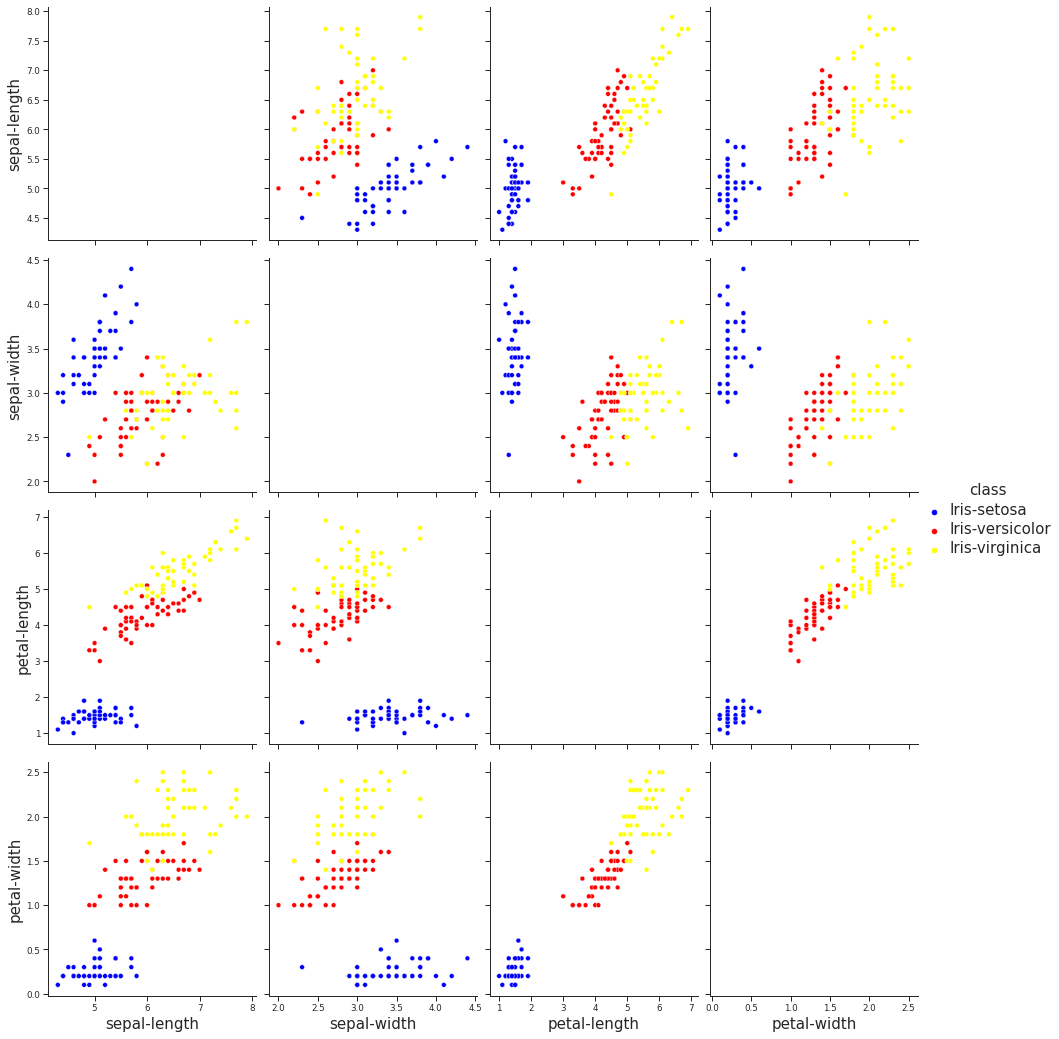

In [137]:
color_wheel = {'Iris-setosa': 'blue', 'Iris-versicolor': 'red', 'Iris-virginica': 'yellow'}

seaborn.set_context('paper', rc={'axes.labelsize': 15})
scatter_plot_matrix = seaborn.pairplot(dataset, hue='class', palette=color_wheel, diag_kind=[])
scatter_plot_matrix.fig.set_size_inches(15, 15)
pyplot.setp(scatter_plot_matrix._legend.get_title(), fontsize='15')
pyplot.setp(scatter_plot_matrix._legend.get_texts(), fontsize='15')

De los gráficos anteriores se puede observar una alta correlación entre los largos del pétalo y del sépalo, así como también una alta correlación entre los anchos del mismo.

En segundo lugar, se construye un scatter plot unidimensional de cada atributo, donde cada valor posible es etiquetado con su respectiva clase.

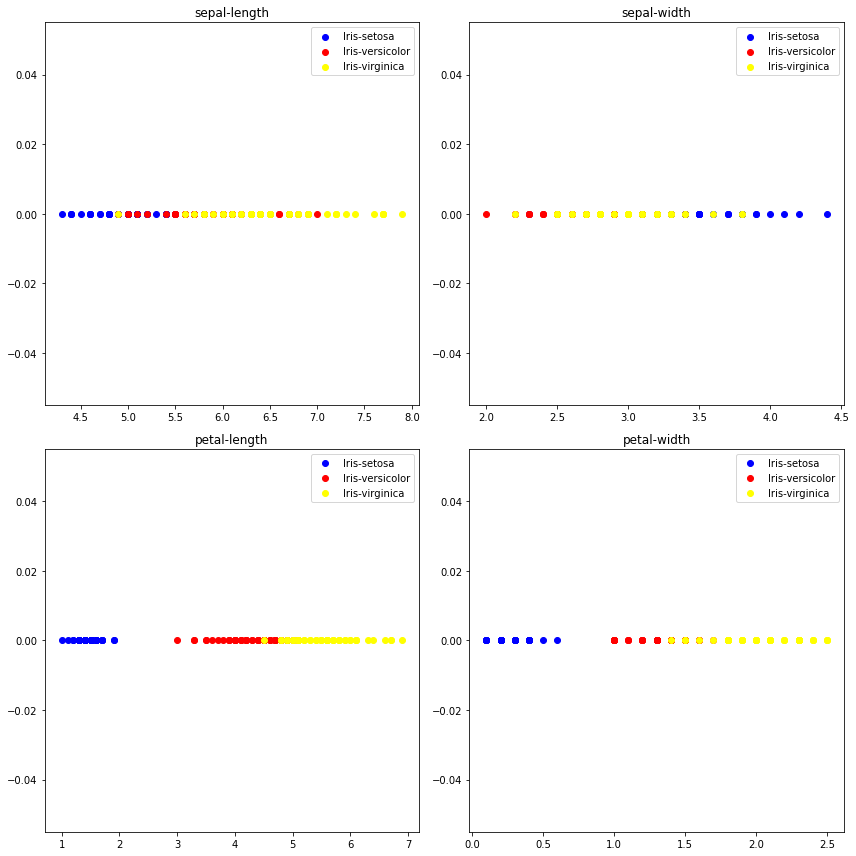

In [55]:
_, axes = pyplot.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

color_wheel = {'Iris-setosa': 'blue', 'Iris-versicolor': 'red', 'Iris-virginica': 'yellow'}
classes = color_wheel.keys()

for (col_name, ax) in zip(dataset.columns[:-1], axes):
    ax.set_title(col_name)
    for flower in classes:
        idx = dataset.index[dataset['class'] == flower]
        ax.scatter(dataset[col_name].loc[idx], numpy.zeros_like(dataset[col_name].loc[idx]), 
                   c=color_wheel[flower], label=flower)
    ax.legend()
    
pyplot.tight_layout()

Finalmente, se crea un histograma para ilustrar la distribución de clases de cada atributo.

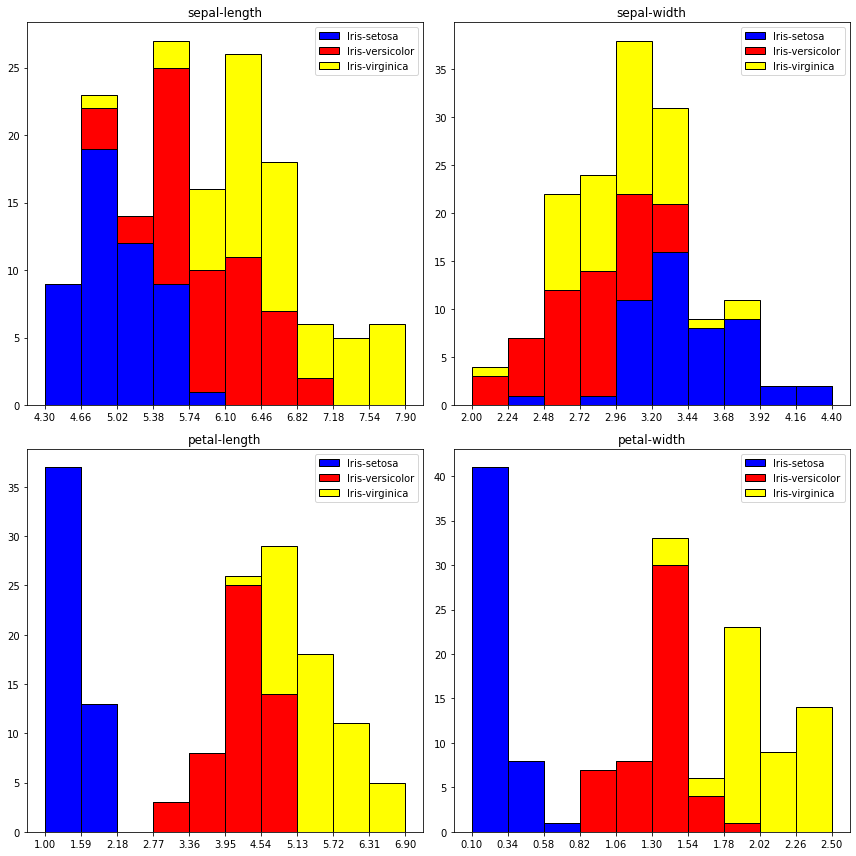

In [56]:
_, axes = pyplot.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()
colors = ['blue', 'red', 'yellow']

classes = dataset['class'].unique()

for (col_name, ax) in zip(dataset.columns[:-1], axes):
    ax.set_title(col_name)
    _, bins, _ = ax.hist([dataset.loc[dataset['class'] == x, col_name] for x in classes], histtype='bar', ec='black', stacked=True, color=colors, label=classes)
    ax.set_xticks(bins)
    ax.legend(classes)

pyplot.tight_layout()

De los últimos dos conjuntos de figuras, scatter plots unidimensionales e histogramas, se desprende que:

- Los sépalos más pequeños corresponden a la flor Iris setosa, los de tamaño intermedio a Iris versicolor y las de mayor tamaño a Iris virginica.

- Los sépalos más angostos corresponden a la flor Iris versicolor, mientras que lo más anchos a Iris setosa.

- Los pétalos más pequeños corresponden a la flor Iris setosa, los de tamaño intermedio a Iris versicolor y las de mayor tamaño a Iris virginica.

- Los pétalos más angostos corresponden a la flor Iris setosa, los de ancho intermedio a Iris versicolor y los más anchos a Iris virginica.

## 4. Preparación de datos

En esta sección se aplicarán todas aquellas operaciones de preparación que puedan ser ejecutadas sobre el conjunto de datos completo, esto es, que no provoquen una fuga de datos (data leakage).

### 4.1 Limpieza de datos 

Se examina la posible presencia de instancias repetidas en el dataset. En caso de que así sea, estas serán eliminadas con el fin de evitar estimaciones optimistas sesgadas de los modelos candidatos sobre datos no vistos.

In [3]:
duplicates = dataset.duplicated()
# Report if there are any duplicates and list all duplicate rows
if duplicates.any():
    print('Se encontraron', len(dataset[duplicates]), 'instancias duplicadas:')
    print('')
    print(dataset[duplicates])
else:
    print('No se encontraron filas duplicadas.')

Se encontraron 3 instancias duplicadas:

     sepal-length  sepal-width  petal-length  petal-width           class
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


Luego, se procede a eliminar las instancias repetidas:

In [4]:
old_num_rows = dataset.shape[0]
dataset.drop_duplicates(inplace=True)
new_num_rows = dataset.shape[0]

print('El dataset, originalmente integrado por', old_num_rows, 'instancias, ha quedado conformado por', new_num_rows,
      'después de eliminar las repeticiones.')

El dataset, originalmente integrado por 150 instancias, ha quedado conformado por 147 después de eliminar las repeticiones.


## 5. Comparación de algoritmos

### 5.1 Creación de conjunto de validación

Se procede a separar el dataset en dos partes:

- La primera parte, correspondiente al 70% de los datos, será utilizada para entrenar los modelos candidatos. El conjunto de datos resultante quedará integrado por 102 instancias. 
- La segunda parte, correspondiente al 30% restante, será retenida y usada como conjunto de validación para evaluar el rendimiento de los modelos candidatos sobre datos no vistos. El conjunto de datos resultante quedará integrado por 45 instancias.

Dado a que los valores de la variable dependiente se encuentran en formato string, se mapeará cada uno de dichos valores a un valor entero de acuerdo al siguiente esquema:

- 'Iris-setosa' -> 0
- 'Iris-versicolor' -> 1
- 'Iris-virginica' -> 2

Además, se estratificará para mantener las distribuciones de las clases tanto en el conjunto de entrenamiento como el de validación. 

In [5]:
array = dataset.values

X = array[:, :-1].astype(float)
Y = array[:, -1]

le = LabelEncoder()
Y = le.fit_transform(Y)

validation_size = 0.3
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
                                                                stratify=Y, random_state=seed)

### 5.2 Definición de arnés de prueba

- Dado a que las clases del problema están balanceadas, se usará la precisión de clasificación como la métrica de evaluación de los modelos.

- Se usará stratified repeated k-fold cross validation con k = 10 y 3 repeticiones para estimar la precisión de los mismos.

### 5.3 Definición de algoritmos candidatos

Se evaluarán los siguientes algoritmos para encontrar el modelo que se desea construir:

- Regresión logística
- LDA
- KNN
- Gaussian Naive Bayes (GNB)
- SVM
- Árbol de decisión
- Random Forest
- Extra Trees
- Adaboost
- Gradient Boosting
- MLP

Notar que es posible dividir los algoritmos en dos grupos:

- Grupo 1: Aquellos que son más sensibles a la escala y a la distribución de los atributos, así como también a la presencia de variables redundantes o irrelevantes. Estos algoritmos son: Regresión logística, LDA, KNN, GNB, SVM y MLP.

- Grupo 2: Aquellos que no debiesen ser sensibles ni a la escala ni a la distribución de los atributos, así como tampoco a la presencia de variables redundantes o irrelevantes. Estos algoritmos son: Árbol de decisión, Random Forest, Extra Trees, Adaboost y Gradient Boosting.

### 5.4 Evaluación de algoritmos candidatos

Una nota importante: toda operación ejecutada en esta sección será aplicada dentro de un pipeline para evitar la fuga de datos (data leakage). Además, todos los algoritmos serán evaluados con sus hiperparámetros por defecto, a menos que se indique lo contrario. En el caso de MLP, sin embargo, es pertinente definir su topología, la que es especificada a continuación:

- Una capa oculta integrada por 8 neuronas. Como activación, se utiliza la función ReLU.

- Capa de salida integrada por 3 neuronas (una por cada clase). Como activación, se utiliza la función softmax.

Durante el proceso de entrenamiento de la red, los pesos de la misma serán actualizados por medio de RMSprop (optimizador por defecto) y en base a la función de perdida categorical crossentropy. Se entrenará durante 200 epochs, con un tamaño de mini-batch de 8.

Notar que para este caso en particular, la variable dependiente será convertida a una matriz booleana mediante one hot encoding, práctica que se acostumbra a llevar cabo al tratar problemas multiclase con redes neuronales.

Luego, la evaluación de los algoritmos se llevará a cabo en dos fases:

1. Limpieza de y transformación de datos: Sobre cada uno de los algoritmos del grupo 1, se estudiará el efecto de diferentes preparaciones de datos. Los del grupo 2, en cambio, serán evaluados directamente, sin preparaciones, considerando la baja sensibilidad que estos poseen respecto a dichas preparaciones. Así, por cada algoritmo "sensible", se testeará el efecto de aplicar las siguientes dos operaciones de manera secuencial:  

- Eliminación de columnas de baja varianza: Si la varianza de una determinada columna es menor a cierto umbral previamente definido, entonces dicha columna será eliminada. Se evaluarán todos los umbrales en el rango [0.0, 0.5], con pasos de tamaño 0.05. 

- Transformación de datos: Se testearán los siguientes cambios de escala y/o de distribución por columnas (o filas, si es que así se indica):

    - Discretización: Usando cinco bins, de tamaños uniformes, y ordinal encoding.
    - Normalización por columnas
    - Estandarización
    - MaxAbsScaler
    - RobustScaler
    - Power Transform: Se evaluará usando tanto el método Yeo-Johnson como el método Box-Cox.
    - Quantil Transform: Se evaluará con distribución de salida tanto gaussiana como uniforme. En ambos casos, el número de cuantiles será de 91, dado que cada fold de entrenamiento quedará integrado por 91 ó 92 observaciones.
    - Normalización por filas

Por cada algoritmo del grupo 1, se seleccionará la combinación de transformaciones que permita, en promedio, obtener la precisión de clasificación más alta. 
    
2. Selección de atributos / reducción de dimensionalidad: Para cada combinación "transformación-algoritmo" seleccionada en el punto 1, y para cada algoritmo del grupo 2, se evaluará el efecto de reducir la dimensionalidad del espacio de entrada por medio de las siguientes técnicas:

- SelectKBest: Se seleccionarán los K atributos que estén más correlacionados con la variable dependiente en base a test ANOVA, con K = 1, 2, 3.
- RFE: Se seleccionarán los n atributos más importantes, con n = 1, 2, 3. Para la determinación de la importancia de los atributos, se estudiará, simultáneamente, el uso de diferentes algoritmos:

    - Regresión logística
    - LDA
    - Árbol de decisión
    - Random Forest
    - Exra Trees
    - AdaBoost
    - Gradient Boosting

- PCA: Se seleccionarán las n componentes principales, con n = 1, 2, 3, 4.

Una vez evaluados, se seleccionarán los tres algoritmos que, en promedio, hayan obtenido la precisión de clasificación más alta para posteriormente sintonizar sus hiperparámetros.

#### 5.4.1 Limpieza y transformación de datos

Se definen, en primer lugar, las operaciones de limpieza y transformación de datos y los algoritmos que serán evaluados.

In [60]:
# Define all VarianceThreshold possible configurations
thresholds = numpy.arange(0.0, 0.55, 0.05)
variance_thresholds = ['passthrough'] + [VarianceThreshold(threshold=t) for t in thresholds]

# Define data transforms 
data_transforms = [
    KBinsDiscretizer(encode='ordinal', strategy='uniform'),
    MinMaxScaler(),
    StandardScaler(),
    MaxAbsScaler(),
    RobustScaler(),
    PowerTransformer(method='yeo-johnson'),
    PowerTransformer(method='box-cox'),
    QuantileTransformer(n_quantiles=91, output_distribution='normal'),
    QuantileTransformer(n_quantiles=91, output_distribution='uniform'),
    Normalizer()
]

# Define sensible algorithms
# NOTE: MLP topology must be defined first

# Define MLP topology
def baseline_model():
    
    # Create model
    model = Sequential()
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

MLP = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=8, verbose=0)

sensible_algorithms = [
    LogisticRegression(),
    LDA(),
    KNN(),
    GNB(),
    SVC(),
    MLP
]

# Define non sensible algorithms
non_sensible_algorithms = [
    CART(),
    RF(),
    ET(),
    AB(),
    GB()
]

Luego, por cada algoritmo "sensible", se evaluan todas las preparaciones de datos posibles.

In [61]:
best_result_per_algorithm = []
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)

# Define data preparation pipelines for sensible algorithms and evaluate them
print('MEJOR CONFIGURACIÓN ENCONTRADA POR CADA ALGORITMO SENSIBLE')
print('-----------------------------------------------------------')
print('')

for algorithm in sensible_algorithms:
    
    best_test_mean_accuracy = float('-inf')
    best_test_mean_accuracy_std = None
    best_train_mean_accuracy = None
    best_train_mean_accuracy_std = None
    best_list_of_test_accuracies = None
    best_threshold = None
    best_transform = None
    
    for variance_threshold in variance_thresholds:
        for data_transform in data_transforms:
            
            pipeline = Pipeline([
                ('vt', variance_threshold),
                ('dt', data_transform),
                ('alg', algorithm)
            ])
            
            if algorithm != sensible_algorithms[-1]:
                cv_results = cross_validate(pipeline, X_train, Y_train, cv=kfold, scoring='accuracy', n_jobs=-1,
                                           return_train_score=True)
            
            else:
                cv_results = {}
                train_results = []
                test_results = []
                
                for i, (train_index, test_index) in enumerate(kfold.split(X_train, Y_train)):
                    
                    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
                    Y_train_kf, Y_test_kf = Y_train[train_index], Y_train[test_index]
                    # Target variable one hot encoding
                    Y_train_kf_ohe = np_utils.to_categorical(Y_train_kf)
                    Y_test_kf_ohe = np_utils.to_categorical(Y_test_kf)
                    pipeline.fit(X_train_kf, Y_train_kf_ohe)
                    train_results.append(pipeline.score(X_train_kf, Y_train_kf_ohe))
                    test_results.append(pipeline.score(X_test_kf, Y_test_kf_ohe))
                    
                cv_results['train_score'] = numpy.asarray(train_results)
                cv_results['test_score'] = numpy.asarray(test_results)
                
            if cv_results['test_score'].mean() > best_test_mean_accuracy:
                best_test_mean_accuracy = cv_results['test_score'].mean()
                best_test_mean_accuracy_std = cv_results['test_score'].std()
                best_train_mean_accuracy = cv_results['train_score'].mean()
                best_train_mean_accuracy_std = cv_results['train_score'].std()
                best_list_of_test_accuracies = cv_results['test_score']
                best_threshold = variance_threshold
                best_transform = data_transform

    best_result_per_algorithm.append(best_list_of_test_accuracies)
    
    print('Algoritmo:', algorithm)
    print('Umbral varianza:', best_threshold)
    print('Transformación de datos:', best_transform)
    print('Precisión de clasificación de entrenamiento promedio:', best_train_mean_accuracy)
    print('Desviación estándar de la precisión de clasificación de entrenamiento:', best_train_mean_accuracy_std)
    print('Precisión de clasificación de prueba promedio:', best_test_mean_accuracy)
    print('Desviación estándar de la precisión de clasificación de prueba:', best_test_mean_accuracy_std)
    print('')

MEJOR CONFIGURACIÓN ENCONTRADA POR CADA ALGORITMO SENSIBLE
-----------------------------------------------------------

Algoritmo: LogisticRegression()
Umbral varianza: passthrough
Transformación de datos: QuantileTransformer(n_quantiles=91, output_distribution='normal')
Precisión de clasificación de entrenamiento promedio: 0.9803989488772099
Desviación estándar de la precisión de clasificación de entrenamiento: 0.010285677381446923
Precisión de clasificación de prueba promedio: 0.9515151515151513
Desviación estándar de la precisión de clasificación de prueba: 0.05981299292836521

Algoritmo: LinearDiscriminantAnalysis()
Umbral varianza: VarianceThreshold(threshold=0.25)
Transformación de datos: QuantileTransformer(n_quantiles=91)
Precisión de clasificación de entrenamiento promedio: 0.989835164835165
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0039062419924739593
Precisión de clasificación de prueba promedio: 0.9869696969696969
Desviación estándar de la pre

Así, los mejores resultados han sido obtenidos por LDA y KNN, los cuales superan el 98% de precisión, con desviaciones estándar del 3%. A continuación, les siguen Gaussian NB, SVM y MLP con precisiones cercanas al 97% y desviaciones estándar del 45. El peor rendimiento es obtenido por Regresión Logística, con un 95% de precisión y desviación estándar de 5%.

Notar que, en general, no se observan signos de sobreajuste en los algoritmos. De forma muy leve, quizás, en Regresión Logística y MLP.

Ya evaluados los algoritmos "sensibles", se procede a evaluar los "no sensibles":

In [62]:
# Evaluate non sensible algorithms
print('RESULTADOS EVALUACIÓN DE ALGORITMOS NO SENSIBLES')
print('-------------------------------------------------')
print('')

for algorithm in non_sensible_algorithms:
    
    cv_results = cross_validate(algorithm, X_train, Y_train, cv=kfold, scoring='accuracy', n_jobs=-1,
                                return_train_score=True)
    
    best_result_per_algorithm.append(cv_results['test_score'])
    
    print('Algoritmo:', algorithm)
    print('Precisión de clasificación de entrenamiento promedio:', cv_results['train_score'].mean())
    print('Desviación estándar de la precisión de clasificación de entrenamiento:', cv_results['train_score'].std())
    print('Precisión de clasificación de prueba promedio:', cv_results['test_score'].mean())
    print('Desviación estándar de la precisión de clasificación de prueba:', cv_results['test_score'].std())
    print('')

RESULTADOS EVALUACIÓN DE ALGORITMOS NO SENSIBLES
-------------------------------------------------

Algoritmo: DecisionTreeClassifier()
Precisión de clasificación de entrenamiento promedio: 1.0
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0
Precisión de clasificación de prueba promedio: 0.9512121212121211
Desviación estándar de la precisión de clasificación de prueba: 0.06100550186692093

Algoritmo: RandomForestClassifier()
Precisión de clasificación de entrenamiento promedio: 1.0
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0
Precisión de clasificación de prueba promedio: 0.9578787878787878
Desviación estándar de la precisión de clasificación de prueba: 0.05472109767504821

Algoritmo: ExtraTreesClassifier()
Precisión de clasificación de entrenamiento promedio: 1.0
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0
Precisión de clasificación de prueba promedio: 0.9478787878787877
Desviación estándar de la p

Los resultados muestran que todos los algoritmos "no sensibles" obtienen resultados inferiores a los de los algoritmos "sensibles". Los primeros, además, dan cuenta de un considerable sobreajuste.

Con el fin de visualizar mejor los resultados, se construye un boxplot que muestra, por cada algoritmo, la distribución de precisiones obtenida por la mejor preparación de datos encontrada.

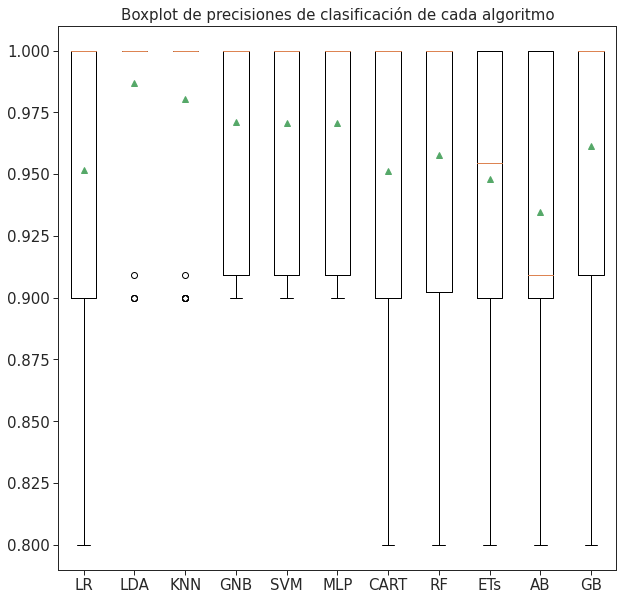

In [198]:
algorithms_names = [
    'LR',
    'LDA',
    'KNN',
    'GNB',
    'SVM',
    'MLP',
    'CART',
    'RF',
    'ETs',
    'AB',
    'GB'
]

fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title('Boxplot de precisiones de clasificación de cada algoritmo')
ax.title.set_fontsize(15)

ax.boxplot(best_result_per_algorithm, labels=algorithms_names, showmeans=True)

for algorithm_label in ax.get_xticklabels():
    algorithm_label.set_fontsize(15)
    
for accuracy_label in ax.get_yticklabels():
    accuracy_label.set_fontsize(15)

pyplot.show()

Luego, la figura anterior confirma el mejor rendimiento de LDA y KNN, al ser quienes alcanzan las precisiones más altas y las desviaciones más bajas. De igual forma, este boxplot también confirma la alta varianza en los resultados de los algoritmos "no sensibles".

#### 5.4.2 Selección de atributos / reducción de dimensionalidad

Ya encontradas las transformaciones de datos que permiten a cada algoritmo obtener la precisión de clasificación más alta, se procede a evaluar cada una de las estrategias de selección de características definidas con anterioridad.

In [241]:
# Define pipelines
best_result_per_pipeline = []

pipelines = [
    
    # Logistic Regression pipeline
    Pipeline([
        ('vt', 'passthrough'),
        ('dt', QuantileTransformer(n_quantiles=91, output_distribution='normal')),
        ('alg', LogisticRegression())
    ]),
    
    # LDA pipeline
    Pipeline([
        ('vt', VarianceThreshold(threshold=0.25)),
        ('dt', QuantileTransformer(n_quantiles=91, output_distribution='uniform')),
        ('alg', LDA())
    ]),

    # KNN pipeline
    Pipeline([
        ('vt', VarianceThreshold(threshold=0.25)),
        ('dt', RobustScaler()),
        ('alg', KNN())
    ]),
    
    # Gaussian Naive Bayes pipeline
    Pipeline([
        ('vt', 'passthrough'),
        ('dt', Normalizer()),
        ('alg', GNB())
    ]),

    # SVM pipeline
    Pipeline([
        ('vt', VarianceThreshold(threshold=0.2)),
        ('dt', Normalizer()),
        ('alg', SVC())
    ]),

    # MLP pipeline
    Pipeline([
        ('vt', VarianceThreshold(threshold=0.0)),
        ('dt', RobustScaler()),
        ('alg', MLP)
    ]),
    
    # CART pipeline
    Pipeline([
        ('alg', CART())
    ]),
    
    # Random Forest pipeline
    Pipeline([
        ('alg', RF())
    ]),
    
    # Extra Trees pipeline
    Pipeline([
        ('alg', ET())
    ]),
    
    # Adaboost pipeline
    Pipeline([
        ('alg', AB())
    ]),
    
    # Gradient boosting pipeline
    Pipeline([
        ('alg', GB())
    ]),
]

# Define all feature selection / dimensionality reduction methods possible configurations
SelectKBest_k = [1, 2, 3]
RFE_estimator = [LogisticRegression(), LDA(), CART(), RF(), ET(), AB(), GB()]
RFE_n_features_to_select = [1, 2, 3]
PCA_n_components = [1, 2, 3, 4]

SelectKBest_combinations = [SelectKBest(k=k) for k in SelectKBest_k]

RFE_combinations = []
for estimator in RFE_estimator:
    for n_features_to_select in RFE_n_features_to_select:
        RFE_combinations.append(RFE(estimator=estimator, n_features_to_select=n_features_to_select))
        
PCA_combinations = [PCA(n_components=n_components) for n_components in PCA_n_components]

fs_methods = ['passthrough'] + SelectKBest_combinations + RFE_combinations + PCA_combinations

print('MEJOR CONFIGURACIÓN ENCONTRADA POR CADA ALGORITMO')
print('-------------------------------------------------')
print('')

for pipeline in pipelines:
    
    best_test_mean_accuracy = float('-inf')
    best_test_mean_accuracy_std = None
    best_train_mean_accuracy = None
    best_train_mean_accuracy_std = None
    best_list_of_test_accuracies = None
    best_fs_method = None
            
    for fs_method in fs_methods:
        
        with warnings.catch_warnings():
            warnings.simplefilter('error')
                    
            try:
                pipeline_temp = clone(pipeline)
                pipeline_temp.steps.insert(-1, ('fs', fs_method))
        
                if type(pipeline_temp['alg']) != KerasClassifier:
                    cv_results = cross_validate(pipeline_temp, X_train, Y_train, cv=kfold, scoring='accuracy', 
                                                n_jobs=-1, return_train_score=True)
            
                else:
            
                    cv_results = {}
                    train_results = []
                    test_results = []
                
                    for i, (train_index, test_index) in enumerate(kfold.split(X_train, Y_train)):
                
                        X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
                        Y_train_kf, Y_test_kf = Y_train[train_index], Y_train[test_index]
                        # Target variable one hot encoding
                        Y_train_kf_ohe = np_utils.to_categorical(Y_train_kf)
                        Y_test_kf_ohe = np_utils.to_categorical(Y_test_kf)
                        pipeline_temp.fit(X_train_kf, Y_train_kf_ohe)
                        train_results.append(pipeline_temp.score(X_train_kf, Y_train_kf_ohe))
                        test_results.append(pipeline_temp.score(X_test_kf, Y_test_kf_ohe))
                    
                    cv_results['train_score'] = numpy.asarray(train_results)
                    cv_results['test_score'] = numpy.asarray(test_results)
                
                if cv_results['test_score'].mean() > best_test_mean_accuracy:
                    best_test_mean_accuracy = cv_results['test_score'].mean()
                    best_test_mean_accuracy_std = cv_results['test_score'].std()
                    best_train_mean_accuracy = cv_results['train_score'].mean()
                    best_train_mean_accuracy_std = cv_results['train_score'].std()
                    best_list_of_test_accuracies = cv_results['test_score']
                    best_fs_method = pipeline_temp['fs']
    
            except:
                pass
    
    best_result_per_pipeline.append(best_list_of_test_accuracies)
    
    print('Algoritmo:', pipeline['alg'])
    print('Pipeline limpieza y transformación de datos:', pipeline.steps[:-1])
    print('Selección de características / reducción de dimensionalidad:', best_fs_method)
    print('Precisión de clasificación de entrenamiento promedio:', best_train_mean_accuracy)
    print('Desviación estándar de la precisión de clasificación de entrenamiento:', best_train_mean_accuracy_std)
    print('Precisión de clasificación de prueba promedio:', best_test_mean_accuracy)
    print('Desviación estándar de la precisión de clasificación de prueba:', best_test_mean_accuracy_std)
    print('')

MEJOR CONFIGURACIÓN ENCONTRADA POR CADA ALGORITMO
-------------------------------------------------

Algoritmo: LogisticRegression()
Pipeline limpieza y transformación de datos: [('vt', 'passthrough'), ('dt', QuantileTransformer(n_quantiles=91, output_distribution='normal'))]
Selección de características / reducción de dimensionalidad: SelectKBest(k=1)
Precisión de clasificación de entrenamiento promedio: 0.960777990125816
Desviación estándar de la precisión de clasificación de entrenamiento: 0.006066503505682177
Precisión de clasificación de prueba promedio: 0.9603030303030302
Desviación estándar de la precisión de clasificación de prueba: 0.0550723707849509

Algoritmo: LinearDiscriminantAnalysis()
Pipeline limpieza y transformación de datos: [('vt', VarianceThreshold(threshold=0.25)), ('dt', QuantileTransformer(n_quantiles=91))]
Selección de características / reducción de dimensionalidad: passthrough
Precisión de clasificación de entrenamiento promedio: 0.989835164835165
Desviación e

Los resultados muestran que seis de los once algoritmos logran beneficiarse de la selección de características / reducción de dimensionalidad. Dichos algoritmos son: Regresión Logística, Gaussian NB, SVM, Árbol de Decisión, Extra Trees y AdaBoost. Las mejoras experimentadas por sus precisiones oscilan entre 0,33% y 1,64%. No deja de llamar la atención que algoritmos como Regresión Logística y Extra Trees logren obtener mejoras al hacer uso de sólo un atributo.

Sin embargo, estas mejoras no son suficientes para superar el rendimiento de LDA y KNN, cuyas precisiones siguen siendo las más altas, aún cuando no logran beneficiarse de la selección de características / reducción de dimensionalidad.

Para una mejor visualización de los resultados, se construye, por cada algoritmo, un boxplot con las precisiones de clasificación en base a la mejor preparación (transformación + selección de características / reducción de dimensionalidad) de datos encontrada para dicho algoritmo.

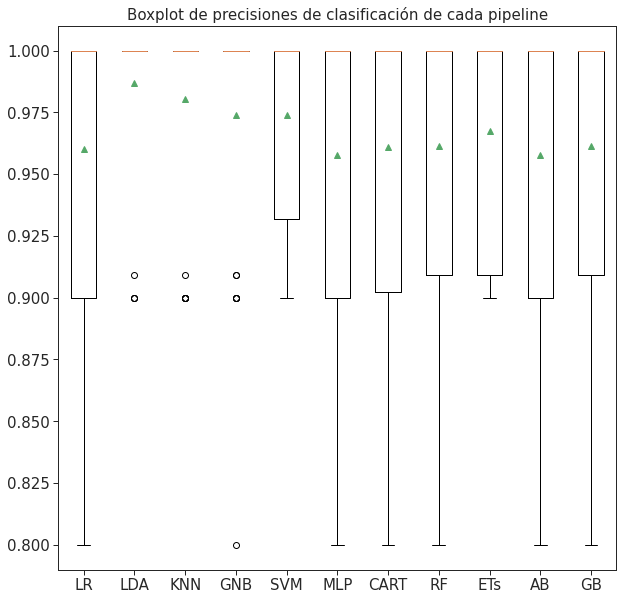

In [242]:
fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title('Boxplot de precisiones de clasificación de cada pipeline')
ax.title.set_fontsize(15)

ax.boxplot(best_result_per_pipeline, labels=algorithms_names, showmeans=True)

for algorithm_label in ax.get_xticklabels():
    algorithm_label.set_fontsize(15)
    
for accuracy_label in ax.get_yticklabels():
    accuracy_label.set_fontsize(15)

pyplot.show()

La figura anterior confirma la idea de que LDA y KNN continúan siendo los algoritmos de mejor rendimiento. Además, se observa una importante reducción en la varianza de los resultados de Gaussian Naive Bayes.

Ya estudiadas las diferentes preparaciones de datos posibles, se procede a seleccionar los tres algoritmos que, en conjunto con preparaciones determinadas, obtienen las precisiones de clasificación promedio más altas para así sintonizar sus hiperparámetros. Dichos algoritmos son:

1. LDA
    - ¿Eliminación de columnas con baja varianza?: Sí, aquellas con varianza menor a 0.25.
    - Transformación de datos: Quantile Transform, con distribución de salida uniforme.
    - ¿Selección de características / reducción de dimensionalidad?: No.
    
2. KNN
    - ¿Eliminación de columnas con baja varianza?: Sí, aquellas con varianza menor a 0.25.
    - Transformación de datos: RobustScaler.
    - ¿Selección de características / reducción de dimensionalidad?: No.
    
3. Gaussian NB
    - ¿Eliminación de columnas con baja varianza?: No.
    - Transformación de datos: Normalización por filas.
    - ¿Selección de características / reducción de dimensionalidad?: Sí, por medio de RFE, con dos atributos seleccionados por medio de LDA.
    
Sin embargo, como Gaussian NB no posee hiperparámetros que puedan ser sintonizados, se selecciona un algoritmo adicional, el cual es:
    
4. SVM
     - ¿Eliminación de columnas con baja varianza?: Sí, aquellas con varianza menor a 0.2.
    - Transformación de datos: Normalización por filas.
    - ¿Selección de características / reducción de dimensionalidad?: Sí, por medio de RFE, con tres atributos seleccionados por medio de Gradient Boosting.
    
Notar que estos algoritmos se encuentran dentro de aquellos que poseen las menores desviaciones estándar de sus resultados y los menores niveles de sobreajuste. 

## 6. Mejora de resultados

### 6.1 Sintonización de hiperparámetros

#### 6.1.1 LDA

- En las secciones anteriores, este algoritmo utilizó SVD ('svd') como solver por defecto. A continuación, se evaluará el efecto de utilizar dos solvers diferentes: mínimos cuadrados ('lsqr') y descomposición de valores propios ('eigen').

- Por cada uno de estos solvers, se evaluará, además, el efecto de diferentes valores de shrinkage (entre 0 y 1, con aumentos de 0.01).

In [64]:
print('SINTONIZACIÓN DE PARÁMETROS DE LDA')
print('----------------------------------')
print('')

# LDA hyperparameter tuning
lda_pipeline = Pipeline([
    ('vt', VarianceThreshold(threshold=0.25)),
    ('dt', QuantileTransformer(n_quantiles=91, output_distribution='uniform')),
    ('fs', 'passthrough'),
    ('lda', LDA())
])

lda_param_grid = {
    'lda__solver': ['lsqr', 'eigen'],
    'lda__shrinkage': numpy.arange(0, 1, 0.01)
}

lda_search = GridSearchCV(lda_pipeline, lda_param_grid, scoring='accuracy', cv=kfold, n_jobs=-1,
                          return_train_score=True)
lda_results = lda_search.fit(X_train, Y_train)

print('Mejores hiperparámetros encontrados:', lda_results.best_params_)
print('Precisión de clasificación promedio de entrenamiento:',
     lda_results.cv_results_['mean_train_score'][lda_results.best_index_])
print('Desviación estándar de la precisión de clasificación de entrenamiento:', 
      lda_results.cv_results_['std_train_score'][lda_results.best_index_])
print('Precisión de clasificación promedio de prueba:', lda_results.best_score_)
print('Desviación estándar de la precisión de clasificación de prueba:', 
      lda_results.cv_results_['std_test_score'][lda_results.best_index_])

SINTONIZACIÓN DE PARÁMETROS DE LDA
----------------------------------

Mejores hiperparámetros encontrados: {'lda__shrinkage': 0.0, 'lda__solver': 'lsqr'}
Precisión de clasificación promedio de entrenamiento: 0.989835164835165
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0039062419924739593
Precisión de clasificación promedio de prueba: 0.9869696969696969
Desviación estándar de la precisión de clasificación de prueba: 0.03325196680803088


Luego, los mejores resultados se obtienen al utilizar mínimos cuadrados como solver y shrinkage de 0. Sin embargo, las precisiones y desviaciones estándar, tanto de entrenamiento como de prueba, son idénticas al hacer uso de SVD como solver. Así, en caso de seleccionar este algoritmo como el modelo final, es posible configurarlo de cualquiera de las dos maneras descritas.

#### 6.1.2 KNN

- Se variará el número de vecinos entre 5 y 29, considerando sólo números impares no divisibles por tres (el número de clases) para así evitar empates.

- Se evaluarán, además, dos estrategias para la determinación de los pesos de los vecinos: uniforme y por distancia.

- Finalmente, para determinar la mejor forma de medir distancias entre vecinos, se evaluará la distancia de Minkowski con valores de p entre 1 y 5. Notar que p = 1 equivale a usar la distancia Manhattan, mientras que p = 2 corresponde a la distancia euclideana.

In [65]:
print('SINTONIZACIÓN DE PARÁMETROS DE KNN')
print('----------------------------------')
print('')

# KNN hyperparameter tuning
knn_pipeline = Pipeline([
    ('vt', VarianceThreshold(threshold=0.25)),
    ('dt', RobustScaler()),
    ('fs', 'passthrough'),
    ('knn', KNN())
])

knn_param_grid = {
    'knn__n_neighbors': [5, 7, 11, 13, 17, 19, 23, 25, 29],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3, 4, 5] 
}

knn_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring='accuracy', cv=kfold, n_jobs=-1,
                          return_train_score=True)
knn_results = knn_search.fit(X_train, Y_train)

print('Mejores hiperparámetros encontrados:', knn_results.best_params_)
print('Precisión de clasificación promedio de entrenamiento:',
     knn_results.cv_results_['mean_train_score'][knn_results.best_index_])
print('Desviación estándar de la precisión de clasificación de entrenamiento:', 
      knn_results.cv_results_['std_train_score'][knn_results.best_index_])
print('Precisión de clasificación promedio de prueba:', knn_results.best_score_)
print('Desviación estándar de la precisión de clasificación de prueba:', 
      knn_results.cv_results_['std_test_score'][knn_results.best_index_])

SINTONIZACIÓN DE PARÁMETROS DE KNN
----------------------------------

Mejores hiperparámetros encontrados: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}
Precisión de clasificación promedio de entrenamiento: 0.9792960662525882
Desviación estándar de la precisión de clasificación de entrenamiento: 0.005900857533157138
Precisión de clasificación promedio de prueba: 0.9803030303030302
Desviación estándar de la precisión de clasificación de prueba: 0.039423066155326314


Los resultados muestran que el mejor resultado se obtiene con cinco vecinos determinados a partir de la distancia euclideana y con pesos uniformes, lo que corresponde a la configuración por defecto del algoritmo.

#### 6.1.3 SVM

- Se considerarán los siguientes valores para el parámetro de regularización C: 0.001, 0.01, 0.1, 1, 10, 100 y 1000.
- Se evaluarán diferentes kernels: lineal, RBF, sigmoid y polinomial.
- Para los kernels RBF, sigmoid y polinomial, se evaluarán diferentes valores de gamma: 0.0001, 0.001, 0.01, 0.1, 1 y 10, así como también las estrategias 'scale' y 'auto' que provee sklearn.
- Para el kernel polinomial, se considerarán diferentes grados entre 2 y 6.

In [66]:
print('SINTONIZACIÓN DE PARÁMETROS DE SVM')
print('----------------------------------')
print('')

# SVM hyperparameter tuning
svm_pipeline = Pipeline([
    ('vt', VarianceThreshold(threshold=0.2)),
    ('dt', Normalizer()),
    ('fs', RFE(estimator=GB(), n_features_to_select=3)),
    ('svm', SVC())
])

svm_param_grid = [
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__kernel': ['linear'],
    },
    
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__kernel': ['rbf', 'sigmoid'],
        'svm__gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1, 10] 
    },
    
    {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__kernel': ['poly'],
        'svm__degree': [2, 3, 4, 5, 6],
        'svm__gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1, 10] 
    }
]

svm_search = GridSearchCV(svm_pipeline, svm_param_grid, scoring='accuracy', cv=kfold, n_jobs=-1, 
                         return_train_score=True)
svm_results = svm_search.fit(X_train, Y_train)

print('Mejores hiperparámetros encontrados:', svm_results.best_params_)
print('Precisión de clasificación promedio de entrenamiento:',
     svm_results.cv_results_['mean_train_score'][svm_results.best_index_])
print('Desviación estándar de la precisión de clasificación de entrenamiento:', 
      svm_results.cv_results_['std_train_score'][svm_results.best_index_])
print('Precisión de clasificación promedio de prueba:', svm_results.best_score_)
print('Desviación estándar de la precisión de clasificación de prueba:', 
      svm_results.cv_results_['std_test_score'][svm_results.best_index_])

SINTONIZACIÓN DE PARÁMETROS DE SVM
----------------------------------

Mejores hiperparámetros encontrados: {'svm__C': 1000, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Precisión de clasificación promedio de entrenamiento: 0.9735188724319157
Desviación estándar de la precisión de clasificación de entrenamiento: 0.01980983665246648
Precisión de clasificación promedio de prueba: 0.98
Desviación estándar de la precisión de clasificación de prueba: 0.039999999999999994


Luego, el mejor resultado para SVM se da con C = 1000, kernel RBF y gamma = 'scale'.

En definitiva, se observa que luego de sintonizar los hiperparámetros de cada algoritmo seleccionado, es LDA quien alcanza la precisión de clasificación promedio más alta y la desviación estándar más baja, siendo estas de un 98,7% y un 3,3%, respectivamente, si bien las diferencias entre los algoritmos son mínimas.

Notar, además, que ninguna de las configuraciones se ve afectada por sobreajuste.

Las ideas anteriores pueden ilustrarse mejor por medio de los siguientes boxplots:

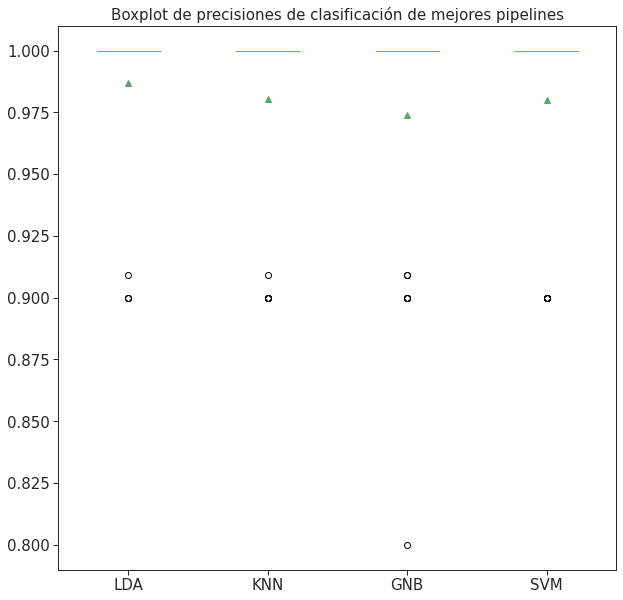

In [254]:
best_pipelines = [
    
    ('best_lda_pipeline', Pipeline([
        ('vt', VarianceThreshold(threshold=0.25)),
        ('dt', QuantileTransformer(n_quantiles=91, output_distribution='uniform')),
        ('fs', 'passthrough'),
        ('lda', LDA())
    ])),
    
    ('best_knn_pipeline', Pipeline([
        ('vt', VarianceThreshold(threshold=0.25)),
        ('dt', RobustScaler()),
        ('fs', 'passthrough'),
        ('knn', KNN())
    ])),
    
    ('best_gnb_pipeline', Pipeline([
        ('vt', 'passthrough'),
        ('dt', Normalizer()),
        ('fs', RFE(estimator=AB(), n_features_to_select=2)),
        ('alg', GNB())
    ])),
    
    ('best_svm_pipeline', Pipeline([
        ('vt', VarianceThreshold(threshold=0.2)),
        ('dt', Normalizer()),
        ('fs', RFE(estimator=GB(), n_features_to_select=3)),
        ('svm', SVC(C=1000, kernel='rbf', gamma='scale', probability=True))
    ]))
]

best_pipelines_names = ['LDA', 'KNN', 'GNB', 'SVM']
best_pipelines_results = []

for _, best_pipeline in best_pipelines:
    best_pipeline_cv_results = cross_validate(best_pipeline, X_train, Y_train, cv=kfold, 
                                              scoring='accuracy', n_jobs=-1)
    
    best_pipelines_results.append(best_pipeline_cv_results['test_score'])

fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title('Boxplot de precisiones de clasificación de mejores pipelines')
ax.title.set_fontsize(15)

ax.boxplot(best_pipelines_results, labels=best_pipelines_names, showmeans=True)

for algorithm_label in ax.get_xticklabels():
    algorithm_label.set_fontsize(15)
    
for accuracy_label in ax.get_yticklabels():
    accuracy_label.set_fontsize(15)

pyplot.show()

### 6.2 Ensamblado de modelos

Se evaluarán tres técnicas diferentes de ensamblado de modelos:

- Hard Voting
- Soft Voting
- Stacking Generalization

En cada caso, los modelos base o estimadores serán aquellos que fueron sintonizados en la sección 6.1 (LDA, KNN y SVM) en conjunto con Gaussian NB y Random Forest.

#### 6.2.1 Hard Voting

A continuación, se construye un ensamblado de tipo hard voting a partir de los estimadores antes mencionados.

In [255]:
estimators = best_pipelines + [('best_rf_pipeline', RF())]

# Define the hard voting ensemble
hv_ensemble = VotingClassifier(estimators=estimators, voting='hard')

# Evaluate the ensemble
hv_cv_results = cross_validate(hv_ensemble, X_train, Y_train, cv=kfold, scoring='accuracy', 
                            n_jobs=-1, return_train_score=True)

print('EVALUACIÓN DE ENSAMBLADO VOTING CLASSIFIER (HARD VOTING)')
print('--------------------------------------------------------')
print('')

print('Miembros del ensamblado:')
for _, estimator in estimators:
    print(estimator)
    print('')

print('Precisión de clasificación de entrenamiento promedio:', hv_cv_results['train_score'].mean())
print('Desviación estándar de la precisión de clasificación de entrenamiento:', hv_cv_results['train_score'].std())
print('Precisión de clasificación de prueba promedio:', hv_cv_results['test_score'].mean())
print('Desviación estándar de la precisión de clasificación de prueba:', hv_cv_results['test_score'].std())

EVALUACIÓN DE ENSAMBLADO VOTING CLASSIFIER (HARD VOTING)
--------------------------------------------------------

Miembros del ensamblado:
Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', QuantileTransformer(n_quantiles=91)),
                ('fs', 'passthrough'), ('lda', LinearDiscriminantAnalysis())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', RobustScaler()), ('fs', 'passthrough'),
                ('knn', KNeighborsClassifier())])

Pipeline(steps=[('vt', 'passthrough'), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=AdaBoostClassifier(), n_features_to_select=2)),
                ('alg', GaussianNB())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.2)), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=XGBClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                   

Los resultados muestran que el ensamblado alcanza una precisión de clasificación de prueba promedio del 99,03%, más alta que todas las de los modelos individuales y la más alta en todo lo que va de este proyecto. Igualmente, se puede apreciar que el ensamblado logra reducir la desviación estándar de la precisión, siendo esta de un 2,9%, inferior a la de todos los estimadores y la más baja hasta ahora. 

No se observan signos de sobreajuste.

#### 6.2.2 Soft Voting

Se construye un ensamblado de tipo soft voting a partir de los estimadores previamente definidos.

In [256]:
# Define the soft voting ensemble
sv_ensemble = VotingClassifier(estimators=estimators, voting='soft')

# Evaluate the ensemble
sv_cv_results = cross_validate(sv_ensemble, X_train, Y_train, cv=kfold, scoring='accuracy', 
                            n_jobs=-1, return_train_score=True)

print('EVALUACIÓN DE ENSAMBLADO VOTING CLASSIFIER (SOFT VOTING)')
print('--------------------------------------------------------')
print('')

print('Miembros del ensamblado:')
for _, estimator in estimators:
    print(estimator)
    print('')

print('Precisión de clasificación de entrenamiento promedio:', sv_cv_results['train_score'].mean())
print('Desviación estándar de la precisión de clasificación de entrenamiento:', sv_cv_results['train_score'].std())
print('Precisión de clasificación de prueba promedio:', sv_cv_results['test_score'].mean())
print('Desviación estándar de la precisión de clasificación de prueba:', sv_cv_results['test_score'].std())

EVALUACIÓN DE ENSAMBLADO VOTING CLASSIFIER (SOFT VOTING)
--------------------------------------------------------

Miembros del ensamblado:
Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', QuantileTransformer(n_quantiles=81)),
                ('fs', 'passthrough'), ('lda', LinearDiscriminantAnalysis())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', RobustScaler()), ('fs', 'passthrough'),
                ('knn', KNeighborsClassifier())])

Pipeline(steps=[('vt', 'passthrough'), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=AdaBoostClassifier(), n_features_to_select=2)),
                ('alg', GaussianNB())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.2)), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=XGBClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                   

En este caso, la precisión de clasificación de prueba promedio es inferior a la alcanzada por Hard Voting y su desviación estándar levemente más alta.

#### 6.2.3 Stacking Generalization

Se utilizará Regresión Logística como meta-modelo. Notar, además, que dicho meta-modelo usará internamente un esquema de 10-fold cross validation para la generación del conjunto de entrenamiento que recibirá como input. Ante esto, se ajustará el número de cuantiles a 81 en el Quantile Transformer que es aplicado sobre los datos recibidos por LDA.

Se evaluarán dos posibles estructuras para el conjunto de entrenamiento que recibe el meta-modelo:

1. Cada observación está definida por sus atributos originales y por las predicciones realizadas por cada estimador en base a dichos atributos.

2. Cada observación está integrada sólo por las predicciones realizadas por cada estimador.

In [257]:
estimators[0] = ('best_lda_pipeline', Pipeline([
    ('vt', VarianceThreshold(threshold=0.25)),
    ('dt', QuantileTransformer(n_quantiles=81, output_distribution='uniform')),
    ('fs', 'passthrough'),
    ('lda', LDA())
]))

stacking_results = []

print('EVALUACIÓN DE ENSAMBLADO STACKING')
print('--------------------------------------------------------')
print('')

print('Miembros del ensamblado:')
for _, estimator in estimators:
    print(estimator)
    print('')
    
for passthrough in [True, False]:
    
    if passthrough:
        print('USANDO TANTO PREDICCIONES DE MODELOS BASE COMO INPUTS ORIGINALES')
        print('-----------------------------------------------------------------')
        print('')
    else:
        print('USANDO SÓLO PREDICCIONES DE MODELOS BASE')
        print('-----------------------------------------------------------------')
        print('')
     
    # Define the soft voting ensemble
    stacking_ensemble = StackingClassifier(estimators=estimators, cv=10, n_jobs=-1, passthrough=passthrough)

    # Evaluate the ensemble
    stacking_cv_results = cross_validate(stacking_ensemble, X_train, Y_train, cv=kfold,
                                         scoring='accuracy', n_jobs=-1,
                                         return_train_score=True)
    
    stacking_results.append(stacking_cv_results['test_score'])
        
    print('Precisión de clasificación de entrenamiento promedio:', stacking_cv_results['train_score'].mean())
    print('Desviación estándar de la precisión de clasificación de entrenamiento:', stacking_cv_results['train_score'].std())
    print('Precisión de clasificación de prueba promedio:', stacking_cv_results['test_score'].mean())
    print('Desviación estándar de la precisión de clasificación de prueba:', stacking_cv_results['test_score'].std())
    print('')

EVALUACIÓN DE ENSAMBLADO STACKING
--------------------------------------------------------

Miembros del ensamblado:
Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', QuantileTransformer(n_quantiles=81)),
                ('fs', 'passthrough'), ('lda', LinearDiscriminantAnalysis())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.25)),
                ('dt', RobustScaler()), ('fs', 'passthrough'),
                ('knn', KNeighborsClassifier())])

Pipeline(steps=[('vt', 'passthrough'), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=AdaBoostClassifier(), n_features_to_select=2)),
                ('alg', GaussianNB())])

Pipeline(steps=[('vt', VarianceThreshold(threshold=0.2)), ('dt', Normalizer()),
                ('fs',
                 RFE(estimator=XGBClassifier(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_byn

/home/seba/.virtualenvs/mlprojects/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/seba/.virtualenvs/mlprojects/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Precisión de clasificación de entrenamiento promedio: 0.9901974836757447
Desviación estándar de la precisión de clasificación de entrenamiento: 0.0032678019130953366
Precisión de clasificación de prueba promedio: 0.9869696969696969
Desviación estándar de la precisión de clasificación de prueba: 0.03325196680803088

USANDO SÓLO PREDICCIONES DE MODELOS BASE
-----------------------------------------------------------------

Precisión de clasificación de entrenamiento promedio: 0.9901974836757447
Desviación estándar de la precisión de clasificación de entrenamiento: 0.004327711501976134
Precisión de clasificación de prueba promedio: 0.9836363636363636
Desviación estándar de la precisión de clasificación de prueba: 0.036620306278838284



Los resultados muestran que la precisión de prueba promedio es levemente superior al proveer al meta-modelo tanto las predicciones de los estimadores como los inputs originales. Aún así, esta precisión no logra ser más alta que la de Hard Voting.

A continuación, se construyen boxplots con las precisiones de cada ensamblado y de cada estimador que lo integra.

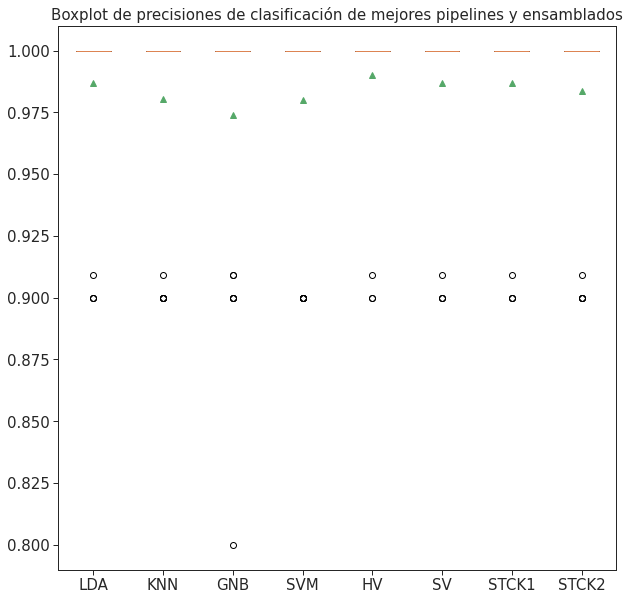

In [258]:
best_pipelines_and_ensembles_names = best_pipelines_names + ['HV', 'SV', 'STCK1', 'STCK2']

best_pipelines_and_ensembles_results = best_pipelines_results + [hv_cv_results['test_score'],
                                                                 sv_cv_results['test_score']] + stacking_results

fig = pyplot.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.set_title('Boxplot de precisiones de clasificación de mejores pipelines y ensamblados')
ax.title.set_fontsize(15)

ax.boxplot(best_pipelines_and_ensembles_results, labels=best_pipelines_and_ensembles_names, showmeans=True)

for algorithm_label in ax.get_xticklabels():
    algorithm_label.set_fontsize(15)
    
for accuracy_label in ax.get_yticklabels():
    accuracy_label.set_fontsize(15)

pyplot.show()

La figura anterior reafirma la idea de que, en promedio, es el ensamblado Hard Voting quien consigue los mejores resultados.

Con estos antecedentes sobre la mesa, se procede a escoger al ensamblado de tipo Hard Voting como el modelo final.

## 7. Evaluación de modelo final sobre conjunto de validación

Con el fin de comprobar su habilidad, el modelo seleccionado será entrenado sobre el conjunto de entrenamiento y posteriormente será evaluado sobre el conjunto de validación. Esto será una importante muestra del verdadero poder predictivo del modelo, ya que el conjunto de validación no ha sido utilizado en ninguna de las fases previas del proyecto, y por tanto, las observaciones que lo integran no han sido vistas por el modelo en cuestión.

Recordar que en la sección 6.2.1 se ha estimado el rendimiento del ensamblado Hard Voting sobre datos no vistos por medio de Repeated stratified 10-fold cross validation (con número de repeticiones igual a tres). Dicha estimación está dada por los siguientes valores:

- Precisión de clasificación de entrenamiento: 99,09%
- Precisión de clasificación de prueba: 99,03%

Luego, se procede a implementar el procedimiento descrito:

In [6]:
estimators[0] = ('best_lda_pipeline', Pipeline([
    ('vt', VarianceThreshold(threshold=0.25)),
    ('dt', QuantileTransformer(n_quantiles=91, output_distribution='uniform')),
    ('fs', 'passthrough'),
    ('lda', LDA())
]))

# Evaluate Hard Voting ensemble over validation set
hv_ensemble.fit(X_train, Y_train)

print('Precisión de clasificación de entrenamiento:', hv_ensemble.score(X_train, Y_train))
print('Precisión de clasificación de validación:', hv_ensemble.score(X_validation, Y_validation))

Precisión de clasificación de entrenamiento: 0.9901960784313726
Precisión de clasificación de validación: 0.9777777777777777


Se observa que la precisión de validación alcanzada por el modelo, que es de un 97,78%, es menor en un 1,25% a la estimada. También se observa que la diferencia con respecto a la precisión de entrenamiento aumenta de 0,60% en la estimación a 1,23% en el caso actual, lo que da cuenta de un leve sobreajuste del modelo en cuestión.

No obstante, los resultados obtenidos son lo suficientemente satisfactorios como para confirmar la elección del ensamblado de tipo Hard Voting como el modelo final.

## 8. Finalización de modelo seleccionado

Se procede a entrenar el modelo seleccionado sobre el conjunto de datos completo para luego guadarlo en disco y eventualmente utilizarlo en futuras predicciones.

In [12]:
# Finalize the selected model
hv_ensemble.fit(X, Y)

# Save the model to disk
with open('hard_voting_classifier.pickle', 'wb') as model_file:
    pickle.dump(hv_ensemble, model_file)

## 9. Presentacion de resultados

Los experimentos llevados a cabo a lo largo de este proyecto han permitido encontrar un modelo que, al ser entrenado sobre un conjunto de observaciones estratificado sobre la variable dependiente integrado por el 70% del total de observaciones disponibles, obtiene un 97,78% de precisión de clasificación sobre el 30% de instancias previamente no observadas. Dicho modelo corresponde a un ensamblado de tipo Hard Voting, integrado por los siguientes estimadores:

- LDA, con hiperparámetros por defecto, cuyos pasos de preparación de datos asociados son:
    - Eliminación de atributos cuya varianza es inferior a 0.25.
    - Aplicación de Quantile Transform sobre atributos, utilizando 91 cuantiles y con distribución de salida uniforme.
    
- KNN, con hiperparámetros por defecto, cuyos pasos de preparación de datos asociados son:
    - Eliminación de atributos cuya varianza es inferior a 0.25.
    - Aplicación de RobustScaler sobre atributos.

- Gaussian NB, con hiperparámetros por defecto, cuyos pasos de preparación de datos asociados son:
    - Normalización por filas.
    - Selección de dos características por medio de RFE, con AdaBoost como estimador de la importancia de los atributos.
    
- SVM, con hiperparámetros por defecto (excepto por parámetro de regularización C, cuyo valor es C=1000), cuyos pasos de preparación de datos asociados son:
    - Eliminación de atributos cuya varianza es inferior a 0.2.
    - Normalización por filas.
    - Selección de tres características por medio de RFE, con Gradient Boosting como estimador de la importancia de los atributos.

- Random Forest, con hiperparámetros por defecto, sin pasos previos de preparación de datos. 